# Marketing Campaign Analysis

## Business Understanding
### Overview
Podha, a growing company, has been running multiple marketing campaigns to acquire new customers. However, due to a crunch in funds, the company has decided to limit its efforts to a single marketing campaign that optimizes budget utilization while maximizing customer acquisition and profitability. Additionally, there is a need to predict customer acquisition based on the available budget.

### Business Problem
The company must identify which marketing campaign has brought in the most profitable customers to ensure financial stability and growth. Furthermore, predicting customer acquisition based on budget will help in strategic planning and resource allocation.

Therefore, I aim to:
1. Evaluate the performance of past marketing campaigns.
2. Determine the best acquisition source based on profitability metrics.
3. Predict customer acquisition based on Podha's budget.
4. Provide actionable recommendations supported by data visualization to inform strategic decisions.


## Data Understanding
Here, I intend to comprehensively explore and analyze our dataset to gain insights into its structure, content, and quality.

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
# Load the dataset
file_path = 'data/Order_Data_meriskill.csv'
df = pd.read_csv(file_path)

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# View the first five rows of the dataset to see if loading has been done correctly
df.head()

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


In [4]:
# View the overallinformation of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55910 entries, 0 to 55909
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            55910 non-null  object 
 1   Region             55910 non-null  object 
 2   Country            55910 non-null  object 
 3   CustID             55910 non-null  object 
 4   Customer_Name      55907 non-null  object 
 5   ProductSKU         55910 non-null  object 
 6   Product_Category   55910 non-null  object 
 7   OrderLineItem      55910 non-null  int64  
 8   OrderQuantity      55910 non-null  float64
 9   ProductCost        55910 non-null  float64
 10  ProductPrice       55910 non-null  object 
 11  OrderDate          55910 non-null  object 
 12  AcquisitionSource  55909 non-null  object 
 13  TransactionID      55910 non-null  object 
 14  Fraud              55207 non-null  object 
 15  PaymentMethod      55910 non-null  object 
 16  CardType           506

In [5]:
# Summary statistics of numerical columns
df.describe()

,OrderLineItem,OrderQuantity,ProductCost
count,55910.000000,55910.000000,55910.000000
mean,1.903237,1.501607,256.143102
std,1.021286,0.612305,496.563101
min,1.000000,1.000000,0.856500
25%,1.000000,1.000000,2.973300
50%,2.000000,1.000000,11.216300
75%,2.000000,2.000000,59.466000
max,8.000000,3.000000,2171.294200


### Data Overview
The dataset provides comprehensive information about customer transactions, including their demographics, purchasing behavior, product preferences, and the sources from which they were acquired.
- **Rows**: 55,910.
- **Columns**: 18.
- **Column Names**: 
     - `Customer Identification and Demographics`: CustID, Customer_Name, Gender.
     - `Transaction and Order Details`: OrderID, OrderLineItem, OrderQuantity, OrderDate, TransactionID.
     - `Geographic Data`: Region, Country.
     - `Product Information`: ProductSKU, Product_Category, ProductCost, ProductPrice.
     - `Customer Acquisition Data`: AcquisitionSource.
     - `Payment Information`: PaymentMethod, CardType.
     - `Risk and Fraud`: Fraud.
- **Data Types**:
     - `Numerical Columns`: 3.
     - `Categorical Columns`: 15.

     **NOTE**: `ProductPrice` is stored as an object and needs to be converted to a numeric format for meaningful statistics.
- **Missing Values**:
     - `Customer_Name`: 3 missing values.
     - `AcquisitionSource`: 1 missing value.
     - `Fraud`: 703 missing values.
     - `CardType`: 5,223 missing values.
     - `Gender`: 6,328 missing values.
- **Relevance to Objectives**
     - `Marketing Campaign Analysis`: Columns such as AcquisitionSource, ProductCost, ProductPrice, and OrderQuantity are directly relevant to calculating profitability and identifying effective campaigns.
     - `Customer Acquisition Prediction`: Fields like Region, Country, AcquisitionSource, and budget-related fields (ProductCost, ProductPrice) can be used to build predictive models.

## Data Cleaning
I am going to identify, correct, and remove errors, inconsistencies, and inaccuracies in our dataset to ensure that the data is accurate, complete, and reliable for analysis.

#### 1. Change Data Types of Columns
Some columns may need to have their data types changed to ensure they are correctly interpreted for analysis (e.g., converting dates from string to datetime format or numerical columns from object to float).

In this step, we are converting the 'ProductPrice' column from an object (string) data type to a numeric data type (float). This is necessary because 'ProductPrice' represents a numerical value, and performing mathematical operations on it in its current string format would not be possible.

In [6]:
# Convert `ProductPrice` to numeric
df.loc[:, 'ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')

#### 2. Remove Duplicates
In this step, we will identify and remove any duplicate rows from the dataset to ensure data integrity and avoid biases in analysis.

In [7]:
# Check for duplicates
df.duplicated().sum()

0

There are **no duplicate rows** in the dataset. Each row in the DataFrame represents a unique record, and no two rows are identical in terms of all column values.

#### 3. Handle Missing Values
Missing values in the dataset are handled by filling them with appropriate values or removing rows/columns that contain them, ensuring the dataset is complete for analysis.

In [8]:
# Check for missing values
df.isna().sum()

OrderID                 0
Region                  0
Country                 0
CustID                  0
Customer_Name           3
ProductSKU              0
Product_Category        0
OrderLineItem           0
OrderQuantity           0
ProductCost             0
ProductPrice            1
OrderDate               0
AcquisitionSource       1
TransactionID           0
Fraud                 703
PaymentMethod           0
CardType             5223
Gender               6328
dtype: int64

A couple of columns have missing values. They include:
- **Customer_Name**: 3 missing values.
- **AcquisitionSource**: 1 missing value.
- **Fraud**: 703 missing values. 
- **CardType**: 5,223 missing values.
- **Gender**: 6,328 missing values. 

**Implications for Data Cleaning**
1. **Handle Columns with Few Missing Values**:
   - `Customer_Name` and `AcquisitionSource`: Consider imputing with a placeholder value like "Unknown" to retain these records.

2. **Handle Columns with Significant Missing Values**:
   - `Fraud`, `CardType`, and `Gender`: Assess the relevance of these columns to the analysis. Options include:
     - Imputing missing values with a default or mode if applicable.
     - Dropping these columns if they are not critical for analysis.
     - Filtering out rows with missing values if the dataset size allows.

In [9]:
# Fill missing values in 'Customer_Name' column with 'Unknown'
df['Customer_Name'] = df['Customer_Name'].fillna("Unknown")

# Fill missing values in 'AcquisitionSource' column with 'Unknown'
df['AcquisitionSource'] = df['AcquisitionSource'].fillna("Unknown")

# Drop rows with missing values in any column 
df.dropna(inplace=True)

# Drop the 'Fraud', 'CardType', and 'Gender' columns from the DataFrame as they are not relevant to the analysis
df = df.drop(columns = ['Fraud', 'CardType', 'Gender'])


# Check again to see if all missing values are handled
df.isna().sum()

OrderID              0
Region               0
Country              0
CustID               0
Customer_Name        0
ProductSKU           0
Product_Category     0
OrderLineItem        0
OrderQuantity        0
ProductCost          0
ProductPrice         0
OrderDate            0
AcquisitionSource    0
TransactionID        0
PaymentMethod        0
dtype: int64

All missing values have been dealt with accordingly.

#### 4. Filter Relevant Columns
We will filter the dataset to include only the columns that are relevant to our analysis, removing unnecessary columns to simplify the dataset.

In this step, we are narrowing down the dataset by selecting only the columns that are relevant for our analysis. The columns we are keeping are:

- **AcquisitionSource**: The source through which the customer was acquired.
- **OrderQuantity**: The number of products ordered by the customer.
- **ProductCost**: The cost of the product.
- **ProductPrice**: The selling price of the product.
- **CustID**: A unique identifier for each customer.

This step helps reduce the complexity of the dataset and focuses only on the necessary features for further analysis.

In [10]:
# Filter the dataset to include only relevant columns
columns_to_keep = [
    'AcquisitionSource', 'OrderQuantity', 'ProductCost', 
    'ProductPrice', 'CustID'
]

# Filter the DataFrame
df_filtered = df[columns_to_keep]

#### 4. Change Data Types of Columns
Some columns may need to have their data types changed to ensure they are correctly interpreted for analysis (e.g., converting dates from string to datetime format or numerical columns from object to float).

In this step, we are converting the 'ProductPrice' column from an object (string) data type to a numeric data type (float). This is necessary because 'ProductPrice' represents a numerical value, and performing mathematical operations on it in its current string format would not be possible.

## Feature Engineering
This involves creating new features relevant to the analysis.

In [11]:
# Create a copy of the DataFrame
df_filtered = df_filtered.copy()

# Calculate Total Profit
df_filtered['TotalProfit'] = (df_filtered['ProductPrice'] - df_filtered['ProductCost']) * df_filtered['OrderQuantity']

# Calculate Budget (Total Spend)
df_filtered['Budget'] = df_filtered['ProductCost'] * df_filtered['OrderQuantity']

# Summarize data by AcquisitionSource
campaign_summary = df_filtered.groupby('AcquisitionSource').agg({
    'TotalProfit': 'sum',
    'Budget': 'sum',
    'CustID': 'nunique'  # Unique users acquired
}).rename(columns={'CustID': 'UsersAcquired'}).reset_index()

# Calculate Profitability per User
campaign_summary['Profitability'] = campaign_summary['TotalProfit'] / campaign_summary['UsersAcquired']

#### Save Processed DataFrame as CSV

In [12]:
# Save the 'df_filtered' DataFrame as a CSV file in the 'Customer_Prediction/data/' folder
df_filtered.to_csv('../Customer_Prediction/data/df_filtered.csv', index=False)

## Exploratory Data Analysis
This involves using various plotting techniques to visually inspect the data.

#### 1. Profitability per User by Acquisition Source

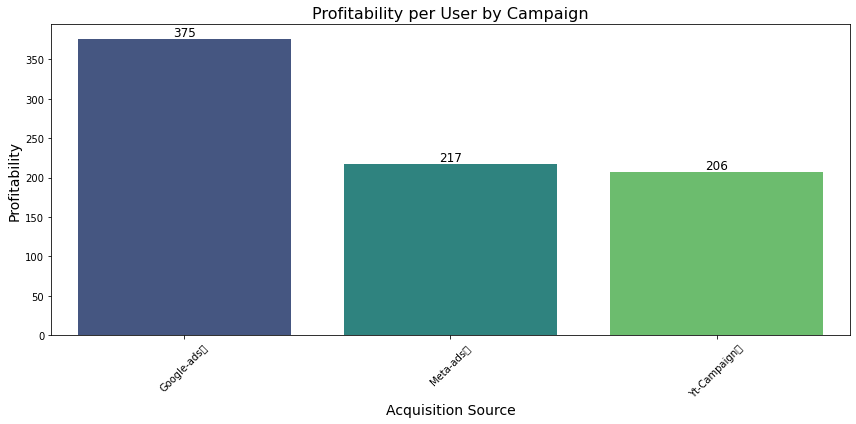

In [13]:
# Sort the campaign summary by 'Profitability' in descending order
campaign_summary_sorted = campaign_summary.sort_values(by='Profitability', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize profitability per user by acquisition source
sns.barplot(x='AcquisitionSource', y='Profitability', data=campaign_summary_sorted, palette='viridis')

# Set the title, x-axis label and y-axis label of the plot
plt.title('Profitability per User by Campaign', fontsize=16)
plt.xlabel('Acquisition Source', fontsize=14)
plt.ylabel('Profitability', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add the values on top of the bars
for index, value in enumerate(campaign_summary_sorted['Profitability']):
    plt.text(index, value + 0.05, str(int(value)), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

#### 2. Total Profit by Acquisition Source

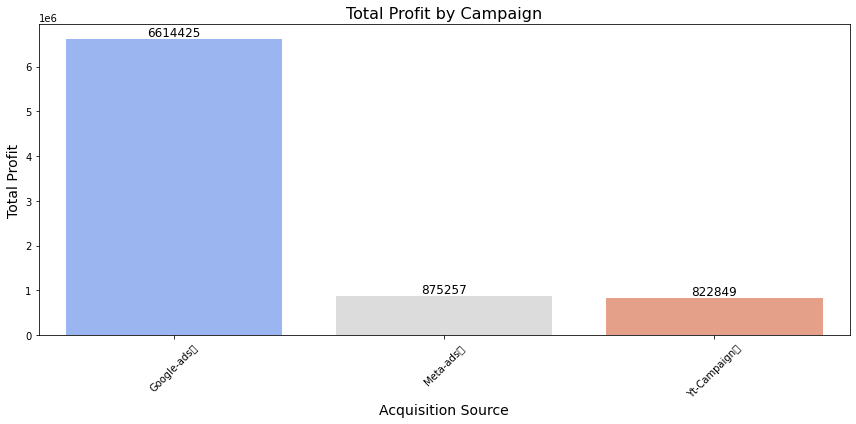

In [14]:
# Sort the campaign summary by 'TotalProfit' in descending order
campaign_summary_sorted = campaign_summary.sort_values(by='TotalProfit', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize total profit by acquisition source
sns.barplot(x='AcquisitionSource', y='TotalProfit', data=campaign_summary_sorted, palette='coolwarm')

# Set the title, x-axis label and y-axis label of the plot
plt.title('Total Profit by Campaign', fontsize=16)
plt.xlabel('Acquisition Source', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add the values on top of the bars
for index, value in enumerate(campaign_summary_sorted['TotalProfit']):
    plt.text(index, value + 0.05, str(int(value)), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

#### 3. Users Acquired by Acquisition Source

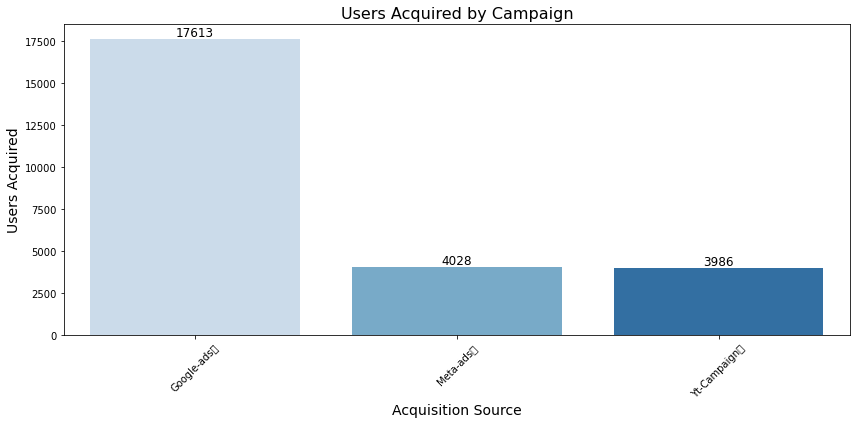

In [15]:
# Sort the campaign summary by 'UsersAcquired' in descending order
campaign_summary_sorted = campaign_summary.sort_values(by='UsersAcquired', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize users acquired by acquisition source
sns.barplot(x='AcquisitionSource', y='UsersAcquired', data=campaign_summary_sorted, palette='Blues')

# Set the title, x-axis label and y-axis label of the plot
plt.title('Users Acquired by Campaign', fontsize=16)
plt.xlabel('Acquisition Source', fontsize=14)
plt.ylabel('Users Acquired', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add the values on top of the bars
for index, value in enumerate(campaign_summary_sorted['UsersAcquired']):
    plt.text(index, value + 0.05, str(int(value)), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()